# **What is the significance of Exploratory Data Analysis (EDA)?**

*  Exploratory data analysis (EDA) helps to understand the data better.
*  It helps you obtain confidence in your data to a point where you're ready to engage a machine learning algorithm.
*  It allows you to refine your selection of feature variables that will be used later for model building.
*  You can discover hidden trends and insights from the data.

# **How would you use Python for EDA?**

Step 1: Import Python Libraries

Step 2: Reading Dataset

Step 3: Data Reduction

Step 4: Feature Engineering

Step 5: Creating Features

Step 6: Data Cleaning/Wrangling

Step 7: EDA Exploratory Data Analysis

Step 8: Handle categorical data

**Importing and Exporting Dataset**

*   df = pd.read_csv(url, delimiter=None, header='infer')
*   df.to_csv(path)

**Print the data**
*   df.head(n): show the first n rows
*   df.tail(n)

**Assign header name:**
*   df.column = ["column1", "column2"....]


In [ ]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Python Practice/titanic_train.csv')
df.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
#How many records in this dataset
df.shape

(891, 12)

# **Basic Insight of Dataset**

**Data Type**

*   df.dtypes
*   df.describe(include = "all") : check mathmatical issues
*   df.info() : concise summary

# **SQL API and Python API**


Connection Method
*   Cursor(): open a cursor object and run queries
*   Commit(): commit any pending transaction to the database
*   Rollback(): cause the database to roll back to the start of any pending transactions
*   Close(): close the database connection

In [ ]:
from dmodule import connect

#Create connection object
connection = connect('databasename', 'username', 'password')

#Create a cursor object
cursor = connection.cursor() #cursor is used to run queries and fetch result

#Run queries
cursor.execute('select * from table')
result = cursor.fetchall()

#Free resources
cursor.close()
connection.close()

# **Pre-processing Data**

* Missing Value
  * Check with the data collection source (check higher quality data source)
  * Drop the missing values (drop variable / data entry)
  * Replace the missing values (average of entire variables; frequency for categorical value; based on other functions
  * Leave it as missing data
*   Data Formatting
  * Bringing data into a common standard of expression allows users to make meaningful comparison, for example: (N.Y., NY. NewYork) to (New York)
  * Applying calculation to an entire column
  * Incorrect data types (df.dtype(); df.astype() (convert data type)
*   Data Normalization (centering / scaling)
  * Uniform the features value with different range, for example: (age, income)
** make the range of data more consistent and make comparing and analyzing values easier
  * Simple feature scaling: X_new = X_old / X_max
  * Min-Max: X_new = (X_old - X_min)/ (X_max - X_min)
  * Z-score: X_new = (X_old - mean)/ sd
*   Data Binning: create bigger category from a set of numerical values, useful for comparing groups of data
  * Convert numeric into categorical; group a set of numerical values into a set of "bins", for example: price into (low, medium, high)
*   Turning categorical values to numeric variables
  * Add dummy variables for each unique category, assign 0 or a in each category
  * Most statistical method requires numerical values


In [ ]:
#missing values
df.dropna(subset = ['price'], axis = 0, inplace = True) #axis = 0: drop row; axis = 1: drop column
df['columnname'].replace(np.nan, df['columnname'].mean(), inplace = True)

#binning
bins = np.linspace(min(df['price']), max(df['price']), 4)
group_names = ['low', 'medium', 'high']
df['price-binned'] = pd.cut(df['price'], bins, labels = group_names, include_lowest = True)
 #use histograms to visualize the distribution

#add dummy variable
pd.get_dummies(df['columnname'])

# **Data Problems in this Dataset**

Placeholder for (possible) issues with this dataset:
+ missing values
+ to impute Age (with average) and Embarked (with mode)
+ to remove Cabin
+ to drop PassengerID (index not useful for supervised learning), Ticket
+ to extract marriage status from Name
+ to convert Sex from female/male to 0/1

In [ ]:
#drop the columns we don't need, create a new copy using inplace = True
df.drop(columns=['PassengerId'], inplace = True)

In [ ]:
#Rename
df.rename(columns={'Fare':'Price'}, inplace=True)
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Price,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


# **Transform a column**

In [ ]:
#Transform a column
df.loc[df['Sex'] == 'female', 'Sex'] = 0
df.loc[df['Sex'] == 'male', 'Sex'] = 1
df.head(2)

#Or
df.replace({'female':0, 'male':1}, inplace=True)

<ipython-input-46-ccfb8c1d36a9>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'female':0, 'male':1}, inplace=True)


In [ ]:
#Another way of transform
df = df.copy()

def Sex2Num(Sex_String):
    if Sex_String == 'female':
        return 0
    elif Sex_String == 'male':
        return 1
    else:
        return Sex_String

df['Sex'] = df['Sex'].apply(Sex2Num)

In [ ]:
#Create a new column
def IsMarried(Name_String):
    if 'Mrs.' in Name_String:
        return 1
    elif 'Miss.' in Name_String:
        return 0
    else:
        return np.nan
df['Married'] = df['Name'].apply(IsMarried)
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Price,Cabin,Embarked,Married
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1.0


In [ ]:
#Another way of creating 'Married' column
df['Married']= df['Name'].apply(lambda x: 1 if 'Mrs.' in x
                                else 0 if 'Miss.' in x
                                else np.nan)


# **Create dummy columns**
`pandas.get_dummies()` allows us to convert a categorical variable with k possible values into k new binary variables called *dummy variables*. This conversion is also called *one-hot encoding* in computer science. Below, we convert column `Embarked` into dummies.
+ Note that dummy conversion is meaningful only if k is small. Otherwise, it creates too many new independent variables, each carrying only negligible amount of informatin.

In [ ]:
df = pd.get_dummies(df, columns=['Embarked'])
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Price,Cabin,Married,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,NaN,False,False,True
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0,True,False,False


# **Create a new calculated column**

In [ ]:
# option axis=1 ensures that the function is applied to each row
df['YoungMale']=df.apply(lambda x : 1 if x.Sex == 1 and x.Age<20 else 0, axis=1)

# **Missing Values**

*   Exclude an entire record if any single value is missing
*   Take the average value of other records and fill in the missing value
*   Use regression analyses to estimate a missing value
*   create a plausible value ased on correlations for the missing data and average the simulated datasets by incorporting random errors in the predictions

In [ ]:
# Drop rows with any missing values
df_no_missing = df.dropna()

df_all_missing = df.dropna(how='all')  #where all values are missing
df_column_missing = df.dropna(subset=['Age'])  #where a specific column has missing values
df_no_missing_columns = df.dropna(axis=1)  #drop entire columns that contain missing values
df_no_missing_rows = df.dropna(axis=0)  #drop entire rows that contain missing values

In [ ]:
#Fill missing values with 0
df_fill_missing_value = df.fillna(0)

In [ ]:
#filter the null values based on one column
df_null = df[pd.isnull(df['Age'])]

# **Exploratory Data Analysis**

* Descriptive Statistics
  * df.describe()
  * df['categorical'].value_counts() : summarize categorical data
  * Box Plots (sns.boxplot(x="Category", y="Price", data=df))
  * Scatter Plots

* Groupby
  * df.groupby()
  * df.pivot(index = 'column', columns = 'column2')
  * Heatmap

* ANOVA: the analysis of variance a statistical method in which the variation in a set of observations is divided into distinct components

* Correlation
  * Visualize: sns.regplot(x='independent', y='dependent', data=df)
    plt.ylim(0,)

* Advanced correlation: Pearson correlation & correlation heatmaps
  * Pearson Correlation
    * correlation coefficient (close to +1, large positive relationship, close to 0, No relationship)
    * The correlation coefficient is covariance divided by the product of the two variables’ standard deviations.
    * p-value (p-value < 0.001: strong certainly in the result; p-value < 0.05 moderate certainly in the result; p-value < 0.1 weak certainly in the result; p>0.1: No certainly in the result)
    * Both the coefficient and P-value are important for confirming a strong correlation
    * pearson_coef, p_value = stats.pearsonr(df['independent'], df['dependent'])
  * Heatmap: indicates the correlation between each of the variables with one another
    * Heatmaps provide a comprehensive visual summary of the strength and direction of correlations among multiple variables.



# **Outliers**

*   Drop the record
*   Cap outlier data
*   Assign a new value
*   Try a new transformation


In [ ]:
#Summary of missing values
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#check if the dataset is balanced by counting the unique values of the target variable
df.Survived.value_counts()

,count
Survived,
0,549
1,342


In [ ]:
df.Age.mean()

29.69911764705882

In [ ]:
#Show statistics
df.describe().loc[['mean', 'std']]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429


In [ ]:
#Keep numeric values only
df_numeric = df.drop(columns = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'])

#Check if data across different scales, significantly skewed (< -2 or > 2)
df_numeric.skew()

,0
PassengerId,0.000000
Survived,0.478523
Pclass,-0.630548
Age,0.389108
SibSp,3.695352
Parch,2.749117
Fare,4.787317


<Figure size 640x480 with 0 Axes>

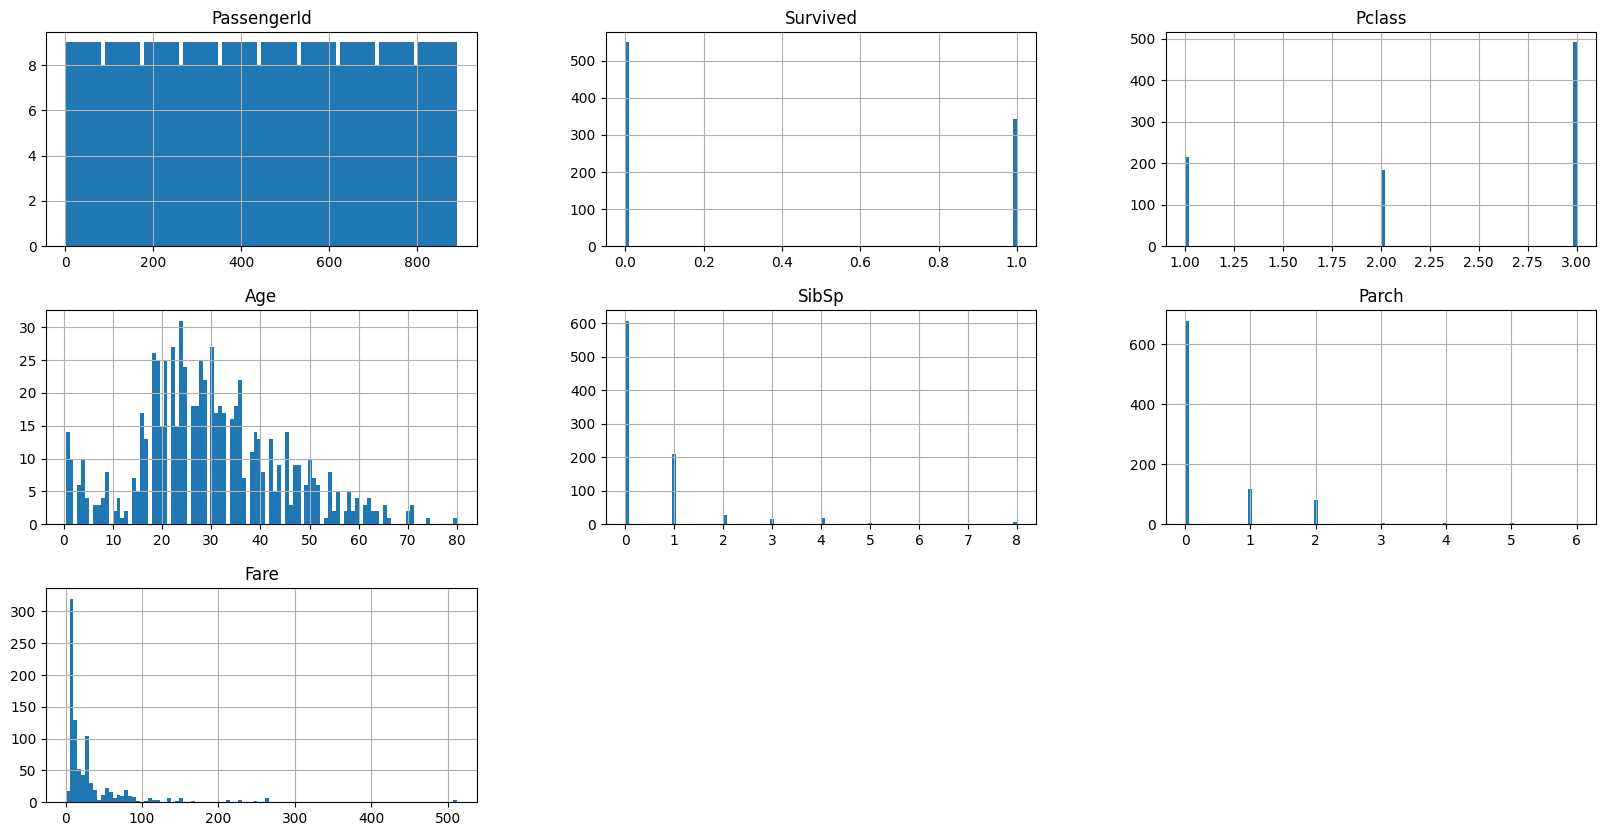

In [ ]:
#Visualize
import matplotlib.pyplot as plt
plt.figure()
df.hist(bins=100, figsize=[20,10])
plt.show()

In [ ]:
#Check correlation
df[['Fare', 'Age']].corr()

,Fare,Age
Fare,1.000000,0.096067
Age,0.096067,1.000000


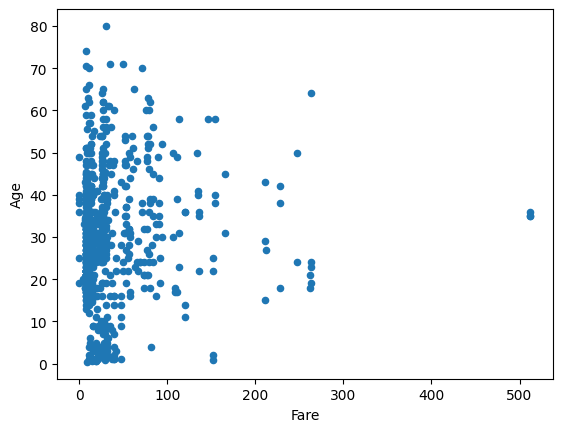

In [ ]:
#Or make a scatter plot
df.plot.scatter(x='Fare', y='Age')
plt.show()

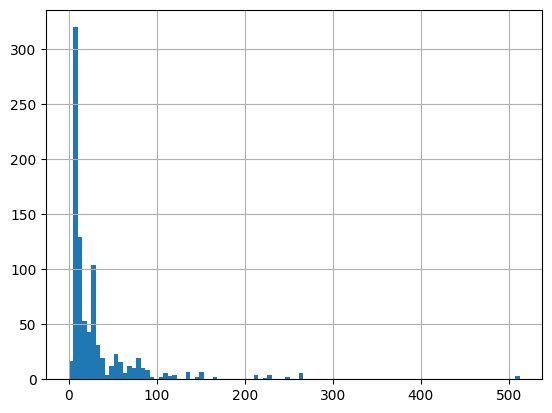

In [ ]:
#Plot historgam to further investigate
df.Fare.hist(bins=100)
plt.show()

In [ ]:
#Calculate the percent of the record where Fare = 0
df[df.Fare==0].shape[0]/df.shape[0]

0.016835016835016835

In [ ]:
df.to_csv('titanic_train_processed.csv', index=False)

# **Model Development**

* Simple Linear Regression & Multiple Linear Regression
  * explain the relationship between one continuous target (y) variable and one or more predictor (x) variables.



In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
X = df[['independent_variable', 'independent_variable2']]
y = df['target']
lm.fit(X, y)

Yhat = lm.predict(X)

**Model Evaluation Using Visualization**

* Regression plot
  * if residual plot (values of error) is randomly separated around 0/ curvature, linear regression is appropriate
  * if residual plot change with x, suggesting linear regression assumption is incorrect

* Distribution plot (multiple variables)
  * counts the predicted value versus the actual value

In [ ]:
import seaborn as sns
sns.regplot(x="independent_variable", y="target", data=df)
plt.ylim(0,)

#residual plot
sns.residplot(df['independent_variable'], df['target'])

#distribution plot
ax1 = sns.distplot(df['target'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

**Polynomial Regression and Pipelines**


* Polynomial regression is a special case of the general linear regression. This method is beneficial for describing curvilinear relationships.
* Curvilinear relationship is what you get by squaring or setting higher-order terms of the predictor variables in the model transforming the data.
* Model can be quadratic / cubic / higher-order


In [ ]:
# polynomial 3rd order
f = np.ployfit(df['independent_variable'], df['target'], 3)
p = np.poly1d(f)
df['prediction'] = p(df['independent_variable'])

# more than one dimension
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=2, include_bias=False)
X_pr = pr.fit_transform(df[['independent_variable', 'independent_variable2']])

#Normalize
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(df[['independent_variable', 'independent_variable2']])

x_scale = scale.transform(df[['independent_variable', 'independent_variable2']])

**Pipeline**

* Pipelines sequentially perform a series of transformations.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

Input = [('polynomial', PolynomialFeatures(include_bias=False)), ('scale', StandardScaler()), ('model', LinearRegression())]
pipe = Pipeline(Input)

pipe.fix(X, y)
yhat = pipe.predict(X)

**Measurement**

* Mean Squared Error (MSE)
  * take the mean of all the errors by adding them together and divide by the number of the samples
  * as the MSE increases, the targets get further from the predicted value
* R-squared
  * The coefficient of determination
  * A measure to determine how close the data is to the fitted regression line
  * one minus the ratio of the MSE of the regression line divided by the MSE of the average of the data points
  * close to 1, fit well; close to 0, do not fit well

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['target'], Yhat)

from sklearn.linear_model import LinearRegression
lm.fit(X,y)
r_squared = lm.score(X, y)

# **Model Evaluation**

* Training / Testing Set
* Generalization Performance
  * Generalization error is a measure of how well our data does at predicting previously unseen data
  * The error we obtain using our testing data is approximation of this error

* Cross Validation
  * One of the most common out-of-sample evaluation metrics
  * the dataset is split into k equal groups. Each group is referred to as a fold, for example, four folds. Some of the folds can be used as a training set which we use to train the model, and the remaining parts are used as a test set which we use to test the model.
  * For example, we can use three folds for training, then use one fold for testing. This is repeated until each partition is used for both training and testing.

In [ ]:
from sklearn.model_selection import train_test_split
#output is array
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=0) #randon_state: number generator used for random sampling

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

scores = cross_val_score(lr, X_data, y_data, cv=3) #lr: Model; cv: the number of partitions, the dataset is split into three equal partitions
np.mean(scores) #out of sample R-squared

predictions = cross_val_predict(lr, X_data, y_data, cv=3)


* Overfitting
* Underfitting

In [ ]:
#calculate different R^2
Rsqu_test = []
order = [1,2,3,4]

for n in order:
  pr = PolynomialFeatures(degree=n)
  x_train_pr = pr.fit_transform(x_train[['variable']])
  x_test_pr = pr.fit_transform(x_test[['variable']])

  lr.fit(x_train_pr, y_train_pr)
  Rsqu_test.append(lr.score(x_test_pr, y_test)

For models with multiple independent features and ones with polynomial feature extrapolation, it is common to have colinear combinations of features. Left unchecked, this multicollinearity of features can lead the model to overfit the training data. To control this, the feature sets are typically regularized using hyperparameters.

Ridge regression is the process of regularizing the feature set using the hyperparameter alpha.

# **Ridge Regression**
* Regularize and reduce standard errors and avoid over-fitting while using a regression model.
* Alpha / Hyperparameter: selected before we fitting the model. If Alpha is too large, the coefficients will approach zero and underfit the data. If Alpha is zero, the overfitting is evident.
  * split into Train and Validation dataset to select alpha parameter, calculate R^2 value, and repeat
  * select the alpha that maximize the R^2

In [ ]:
#How to select alpha?
from sklearn.linear_model import Ridge
RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(x_train, y_train)

Yhat = RidgeModel.predict(x_train)

In [ ]:
#Visualize Alpha
# as the alpha increase, the value of R^2 increases, the R^2 of test data decrease, because it prevent overfitting

# **Grid Search**

* Automatically iterating over these hyperparameters using cross-validation called Grid Search
* Split dataset into three parts: Training; Validation; Test set
* Using R^2 / MSE on validation set




In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

parameters1 = [{'alpha': [0.001, 0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
#add normalization
parameters = [{'alpha': [1, 10, 100, 1000], 'normalize': [True, False]}]
#output is 2 set for True / False

RR = Ridge()

Grid1.fit(x_data[['variable1', 'variable2', 'variable3']], y_data)
Grid1.best_estimator_
Grid1.best_score_

scores = Grid1.cv_results_
scores['mean_test_score']